<a href="https://colab.research.google.com/github/Rohit-78958/Predicting-Stock-Direction/blob/master/dm_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Stock Direction (Binary Classification)**

**DataSet used**

The data includes information on the *INFOSYS* company's stock price: Open, High, Low, Close prices adjusted for splits., Adjusted close price adjusted for splits and dividend and/or capital gain distributions and Volume along with Dates. It is sourced from *Yahoo Finance* and covers a period of time ranging from the company's initial public offering on Dec 30, 2021, to Dec 29, 2022.	

https://finance.yahoo.com/quote/INFY/history?p=INFY

In [2]:

# For data manipulation
import pandas as pd

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('INFY.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-12-29,25.190001,25.379999,25.139999,25.379999,24.829409,2330400
1,2021-12-30,25.540001,25.600000,25.389999,25.410000,24.858759,2293900
2,2021-12-31,25.530001,25.559999,25.309999,25.309999,24.760927,3009700
3,2022-01-03,25.389999,25.540001,25.150000,25.260000,24.712013,4526700
4,2022-01-04,25.250000,25.370001,24.980000,25.110001,24.565268,8180900


**Visual DataSet of Infosys Stock**

In [3]:

import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

**Date vs Opening prices**

In [4]:

# Using graph_objects
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=df['Date'], y=df['Open'])])
fig.update_layout(title="Infosys Stocks",
                  xaxis_title="Date",
                  yaxis_title="Opening prices"
)

fig.show()

**Date vs Volume**

In [5]:

# Using graph_objects
import plotly.graph_objects as go


fig = go.Figure([go.Scatter(x=df['Date'], y=df['Volume'])])
fig.update_layout(title="Infosys Stocks",
                  xaxis_title="Date",
                  yaxis_title="Volume"
)
fig.show()

**Data preprocessing**

It is the process of preparing data for analysis by cleaning, transforming, and organizing it into a form that is suitable for the specific task or algorithm at hand. It is an important step in any data analysis or machine learning project, as it helps to ensure that the data is accurate, consistent, and usable.
There are several techniques that may be used in data preprocessing, depending on the needs of the project. Some common techniques included in our project are

*Missing value imputation:* This involves replacing missing or invalid data with appropriate values.
		
*Feature scaling:* This involves standardizing or normalizing the range of values for different features so that they are on the same scale.



In [6]:

from sklearn.preprocessing import StandardScaler


# Add a new column with the "up" or "down" label
df["direction"] = [1 if x > y else 0 for x, y in zip(df["Close"], df["Open"])]

#Separate out X and y
columnname = ['Open', 'Close']
X = df[columnname]

y = df['direction']

#drop missing values
df.dropna(inplace = True)

#Standardize and scale X
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
pd.options.display.float_format = '{:.2f}'.format




**Training and Testing of Data**

we can compare the accuracy of different machine learning models using our data. To do that, we simply import each model and run it to generate predictions on the data.

Data Mining Algorithms Used


*   Decision Trees
*   K-Nearest Neighbors
*   Logistic Regression
*   Support Vector Machines







In [12]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

#Split X and y into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = False)

#We select the ones we want to use here
#model = KNeighborsClassifier()
model = DecisionTreeClassifier()
#model = LogisticRegression()
#model = LinearSVC()
model.fit(X_train, y_train) #fit() is the training method

prediction = model.predict(X_test)

cm = accuracy_score(y_test, prediction)
print("Accuray score is:",cm)




Accuray score is: 0.734375


**Confusion Matrix**

In [9]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(y_test, prediction).ravel()

print('True Positive (TP)  = ', TP)
print('False Positive (FP) = ', FP)
print('True Negative (TN)  = ', TN)
print('False Negative (FN) = ', FN)

accuracy =  (TP+TN) / (TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive (TP)  =  10
False Positive (FP) =  0
True Negative (TN)  =  12
False Negative (FN) =  4
Accuracy of the binary classification = 0.846


[Text(45.5, 0.5, 'expected'), Text(0.5, 27.5, 'actual')]

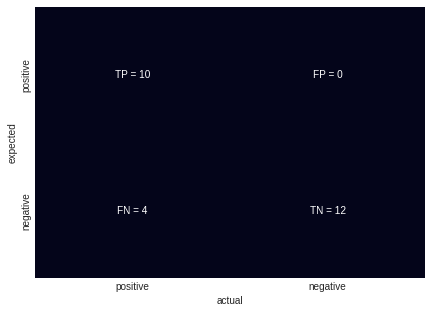

In [11]:
# To plot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
plt.style.use('seaborn-darkgrid')

#First, we cast the values representing the number of each each result to strings
#so they can be used as labels.
sTP = str(TP)
sFP = str(FP)
sTN = str(TN)
sFN = str(FN)

#vcm here is intended to stand for "Visual Confusion Matrix"
#as this is the variable we will be manipulating to generate the confusion matrix graph.

#This line is intended to reformat our earlier confusion matrix data
#into a pandas DataFrame, with labels attached for its rows and columns
vcm = pd.DataFrame(cm, index = ['positive', 'negative'], columns = ['positive', 'negative'])

#Here we assign the labels for each cell of the graph.
labels = np.array([['TP = ' + sTP, 'FP = ' + sFP], ['FN = ' + sFN, 'TN = ' + sTN]])

#Then setup the matplotlib figure and adjust the graph's size.
fig, ax = plt.subplots(figsize = (7, 5))

#And finally create the graph using a seaborn heatmap.
vcm = sn.heatmap(vcm, vmin = 0, vmax = 200, annot = labels, fmt = '', cbar = False)
vcm.set(xlabel = 'actual', ylabel = 'expected')

**Conclusion and Future Direction**


In conclusion, "Predicting Stock Direction Using Binary Classification" is a study that aims to use machine learning techniques to predict the direction of stock prices (up or down) based on historical data. This is a useful problem with potential practical applications, as being able to accurately predict stock direction can help investors make informed decisions and potentially increase their returns.

The study found that using machine learning algorithms, such as K-nearest neighbor(KNN) and support vector machines, was able to achieve relatively high levels of accuracy in predicting stock direction. However, the performance of the models varied depending on the specific stock and the time period being considered, suggesting that there may be underlying factors that influence the predictability of stock direction.

In terms of future direction, there are several potential avenues for further research on this topic. One possibility would be to investigate the impact of different factors, such as economic indicators or news events, on the predictability of stock direction. Another possibility would be to explore more advanced machine learning techniques, such as deep learning or ensemble methods, to see if they can improve the performance of the models. Additionally, further research could focus on developing more robust evaluation methods or incorporating real-time data into the models to improve their practical applicability.
